# Association Rule Mining

**Course:** Data Mining  
**Project Type:** Association Rule Mining  
**Dataset:** Movie Ratings Dataset  


---

## Introduction

Association Rule Mining is a data mining technique used to discover hidden relationships between items in large datasets.  
In this project, association rule mining is applied to a **movie ratings dataset** to uncover patterns in user viewing behavior.

Instead of traditional market basket data, we treat **movies as items** and **users as transactions**, allowing us to find rules such as:

> *Users who watched Movie A and Movie B are likely to watch Movie C.*



### Environment Setup

This section sets up the Python environment and required libraries.


In [76]:
!pip install pandas numpy matplotlib seaborn mlxtend


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import libraries

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

sns.set(style="whitegrid")


### Dataset Description

This project uses two datasets:
- **movies_metadata.csv** – contains movie information
- **ratings_small.csv** – contains user ratings for movies



In [78]:
movies = pd.read_csv("../data/movies_metadata.csv", low_memory=False)
ratings = pd.read_csv("../data/ratings_small.csv")

In [79]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [80]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [81]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [82]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### Data Cleaning and Preprocessing

Data cleaning ensures consistency and removes unnecessary or invalid entries.

##### Dataset overview

In [83]:
movies = movies[['id', 'title']]
movies = movies.dropna()

In [84]:
ratings = ratings.dropna()

In [85]:
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
movies = movies.dropna()

In [86]:
data = ratings.merge(movies, left_on='movieId', right_on='id')
data.head()

,userId,movieId,rating,timestamp,id,title
0,1,1371,2.5,1260759135,1371,Rocky III
1,1,1405,1.0,1260759203,1405,Greed
2,1,2105,4.0,1260759139,2105,American Pie
3,1,2193,2.0,1260759198,2193,My Tutor
4,1,2294,2.0,1260759108,2294,Jay and Silent Bob Strike Back


##### Handle missing values

In [87]:
movies = movies[['id', 'title']]
movies = movies.dropna()

In [88]:
ratings = ratings.dropna()

##### Convert IDs to Numeric

In [89]:
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
movies = movies.dropna()

##### Merge Dataset

In [90]:
data = ratings.merge(movies, left_on='movieId', right_on='id')
data.head()

,userId,movieId,rating,timestamp,id,title
0,1,1371,2.5,1260759135,1371,Rocky III
1,1,1405,1.0,1260759203,1405,Greed
2,1,2105,4.0,1260759139,2105,American Pie
3,1,2193,2.0,1260759198,2193,My Tutor
4,1,2294,2.0,1260759108,2294,Jay and Silent Bob Strike Back


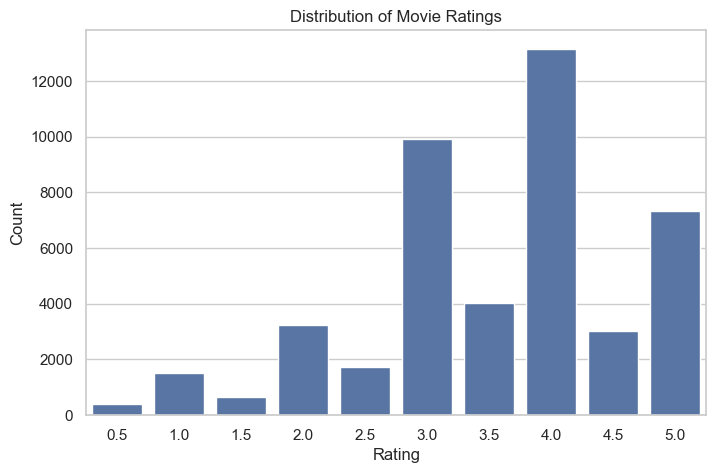

In [91]:
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=data)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Most users give ratings between 3.0 and 5.0, indicating generally positive feedback.

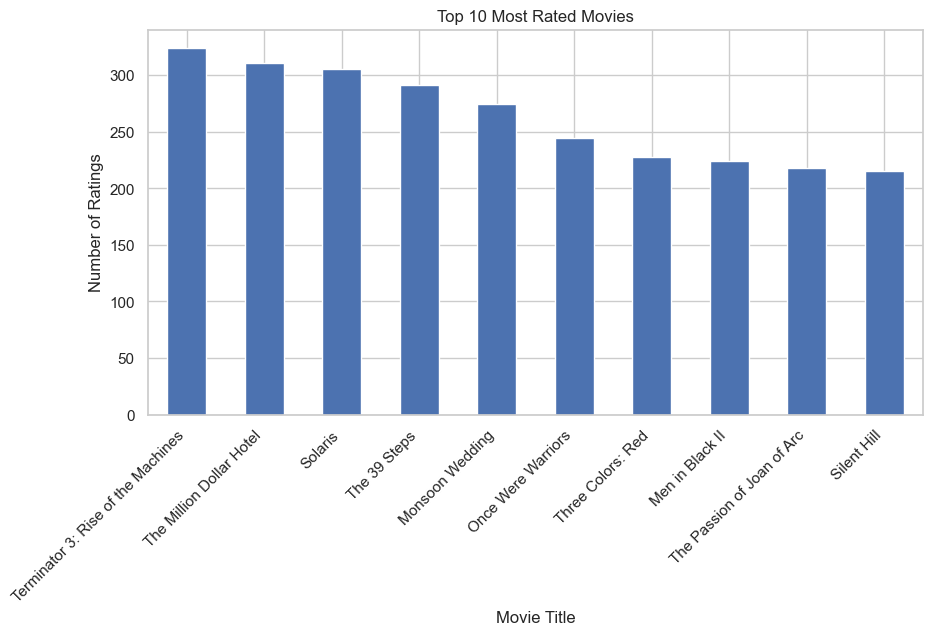

In [92]:
top_movies = data['title'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_movies.plot(kind='bar')
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Movie Title")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45, ha='right')
plt.show()


Popular movies appear more frequently, which can strongly influence association rules.

### Data Transformation

To apply association rule mining:
- Each **user** is treated as a transaction
- Each **movie title** is treated as an item
- Only movies rated above a threshold are considered "watched"


In [93]:
data = data[data['rating'] >= 4.0]

In [94]:
user_movies = data.groupby('userId')['title'].apply(list)
user_movies.head()

userId
1                                       [American Pie]
2    [The Dark, Three Colors: Red, 48 Hrs., Lost in...
3    [Three Colors: Red, Terminator 3: Rise of the ...
4    [Italian for Beginners, Donnie Darko, Lost in ...
5    [Shadows in Paradise, Run Lola Run, Donnie Dar...
Name: title, dtype: object

In [95]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(user_movies).transform(user_movies)

basket = pd.DataFrame(te_array, columns=te.columns_)
basket.head()

,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",12 Angry Men,13 Tzameti,1408,15 Minutes,...,Zatoichi,Zatôichi's Pilgrimage,Zodiac,Zombie Flesh Eaters,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [96]:
te = TransactionEncoder()
te_array = te.fit(user_movies).transform(user_movies)

basket = pd.DataFrame(te_array, columns=te.columns_)
basket.head()


,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",12 Angry Men,13 Tzameti,1408,15 Minutes,...,Zatoichi,Zatôichi's Pilgrimage,Zodiac,Zombie Flesh Eaters,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


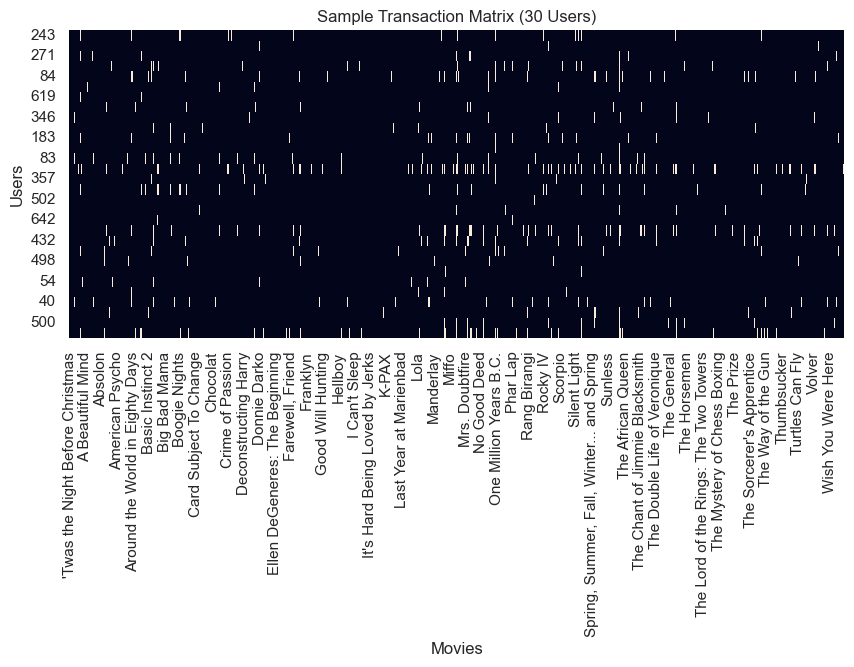

In [97]:
plt.figure(figsize=(10,4))
sns.heatmap(basket.sample(30), cbar=False)
plt.title("Sample Transaction Matrix (30 Users)")
plt.xlabel("Movies")
plt.ylabel("Users")
plt.show()


The matrix is highly sparse, which is expected in recommendation-style datasets.

### Association Rule Mining

Apply Apriori algorithm to generate frequent itemsets  

In [98]:
frequent_itemsets = apriori(
    basket,
    min_support=0.05,
    use_colnames=True
)

frequent_itemsets.head()


,support,itemsets
0,0.061286,(2001: A Space Odyssey)
1,0.204783,(48 Hrs.)
2,0.237668,(5 Card Stud)
3,0.071749,(A Brief History of Time)
4,0.143498,(A Nightmare on Elm Street)


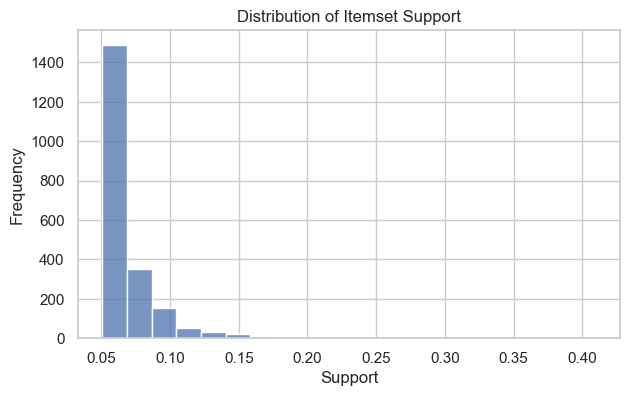

In [99]:
plt.figure(figsize=(7,4))
sns.histplot(frequent_itemsets['support'], bins=20)
plt.title("Distribution of Itemset Support")
plt.xlabel("Support")
plt.ylabel("Frequency")
plt.show()

Most itemsets have low support, meaning only a few movie combinations are commonly watched together.

Generate association rules using lift and confidence  

In [100]:
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.6
)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(48 Hrs.),(The Million Dollar Hotel),0.204783,0.409567,0.130045,0.635036,1.550509,1.0,0.046172,1.617788,0.446483,0.268519,0.381872,0.476277
1,(The Science of Sleep),(48 Hrs.),0.083707,0.204783,0.052317,0.625000,3.052007,1.0,0.035175,2.120578,0.733768,0.221519,0.528430,0.440237
2,(And Then There Were None),(5 Card Stud),0.118087,0.237668,0.080717,0.683544,2.876045,1.0,0.052652,2.408969,0.739642,0.293478,0.584885,0.511583
3,(Bad Boys II),(5 Card Stud),0.122571,0.237668,0.091181,0.743902,3.130005,1.0,0.062050,2.976724,0.775575,0.338889,0.664060,0.563775
4,(Boogie Nights),(5 Card Stud),0.115097,0.237668,0.070254,0.610390,2.568243,1.0,0.042899,1.956652,0.690052,0.248677,0.488923,0.452994


### Initial Result

In [101]:
rules.sort_values(by='confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1854,"(Point Break, Sleepless in Seattle, License to...",(Terminator 3: Rise of the Machines),0.062780,0.376682,0.061286,0.976190,2.591553,1.0,0.037637,26.179372,0.655269,0.162055,0.961802,0.569444
1961,"(Once Were Warriors, Men in Black II, The Tale...",(Sleepless in Seattle),0.056801,0.266069,0.055306,0.973684,3.659521,1.0,0.040193,27.889387,0.770506,0.206704,0.964144,0.590775
2367,"(The Talented Mr. Ripley, Point Break, The 39 ...",(Terminator 3: Rise of the Machines),0.055306,0.376682,0.053812,0.972973,2.583012,1.0,0.032979,23.062780,0.648734,0.142292,0.956640,0.557915
2607,"(The Talented Mr. Ripley, Young and Innocent, ...",(Terminator 3: Rise of the Machines),0.055306,0.376682,0.053812,0.972973,2.583012,1.0,0.032979,23.062780,0.648734,0.142292,0.956640,0.557915
2122,"(Monsieur Hulot's Holiday, Solaris, The 39 St...",(Terminator 3: Rise of the Machines),0.053812,0.376682,0.052317,0.972222,2.581019,1.0,0.032047,22.439462,0.647393,0.138340,0.955436,0.555556
2118,"(Monsieur Hulot's Holiday, Solaris, Sleepless...",(Terminator 3: Rise of the Machines),0.052317,0.376682,0.050822,0.971429,2.578912,1.0,0.031115,21.816143,0.646038,0.134387,0.954162,0.553175
1523,"(The Talented Mr. Ripley, The Tunnel)",(Terminator 3: Rise of the Machines),0.052317,0.376682,0.050822,0.971429,2.578912,1.0,0.031115,21.816143,0.646038,0.134387,0.954162,0.553175
1864,"(Point Break, The 39 Steps, License to Wed)",(Terminator 3: Rise of the Machines),0.052317,0.376682,0.050822,0.971429,2.578912,1.0,0.031115,21.816143,0.646038,0.134387,0.954162,0.553175
2669,"(Once Were Warriors, Men in Black II, Terminat...",(Sleepless in Seattle),0.052317,0.266069,0.050822,0.971429,3.651043,1.0,0.036902,25.687593,0.766190,0.189944,0.961071,0.581220
2537,"(The Talented Mr. Ripley, The Man with the Gol...",(Terminator 3: Rise of the Machines),0.052317,0.376682,0.050822,0.971429,2.578912,1.0,0.031115,21.816143,0.646038,0.134387,0.954162,0.553175


In [102]:
rules.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
101,(Waiter),(Muxmäuschenstill),0.067265,0.083707,0.055306,0.822222,9.822619,1.0,0.049676,5.154148,0.962968,0.578125,0.805982,0.741468
100,(Muxmäuschenstill),(Waiter),0.083707,0.067265,0.055306,0.660714,9.822619,1.0,0.049676,2.749115,0.980248,0.578125,0.636247,0.741468
2677,"(Once Were Warriors, The Talented Mr. Ripley)","(Men in Black II, Terminator 3: Rise of the Ma...",0.079223,0.089686,0.050822,0.641509,7.152830,1.0,0.043717,2.539297,0.934206,0.430380,0.606190,0.604088
2716,"(The Talented Mr. Ripley, The 39 Steps)","(Men in Black II, Terminator 3: Rise of the Ma...",0.086697,0.089686,0.052317,0.603448,6.728448,1.0,0.044541,2.295574,0.932195,0.421687,0.564379,0.593391
2745,"(Once Were Warriors, The Talented Mr. Ripley)","(Terminator 3: Rise of the Machines, Solaris, ...",0.079223,0.104634,0.053812,0.679245,6.491644,1.0,0.045522,2.791436,0.918741,0.413793,0.641761,0.596765
545,"(Dawn of the Dead, The Thomas Crown Affair)",(Lonely Hearts),0.094170,0.095665,0.056801,0.603175,6.305060,1.0,0.047792,2.278924,0.928869,0.426966,0.561196,0.598462
2755,"(Once Were Warriors, The Talented Mr. Ripley)","(Terminator 3: Rise of the Machines, The Milli...",0.079223,0.106129,0.052317,0.660377,6.222429,1.0,0.043909,2.631955,0.911503,0.393258,0.620054,0.576668
1786,"(Men in Black II, The Thomas Crown Affair)","(Dawn of the Dead, Sleepless in Seattle)",0.086697,0.097160,0.052317,0.603448,6.210875,1.0,0.043893,2.276727,0.918635,0.397727,0.560773,0.570955
1580,(Shriek If You Know What I Did Last Friday the...,"(5 Card Stud, License to Wed)",0.076233,0.121076,0.056801,0.745098,6.153958,1.0,0.047571,3.448086,0.906617,0.404255,0.709984,0.607117
2673,"(Once Were Warriors, Men in Black II, The Tale...","(Terminator 3: Rise of the Machines, Sleepless...",0.056801,0.147982,0.050822,0.894737,6.046252,1.0,0.042417,8.094170,0.884870,0.330097,0.876454,0.619086


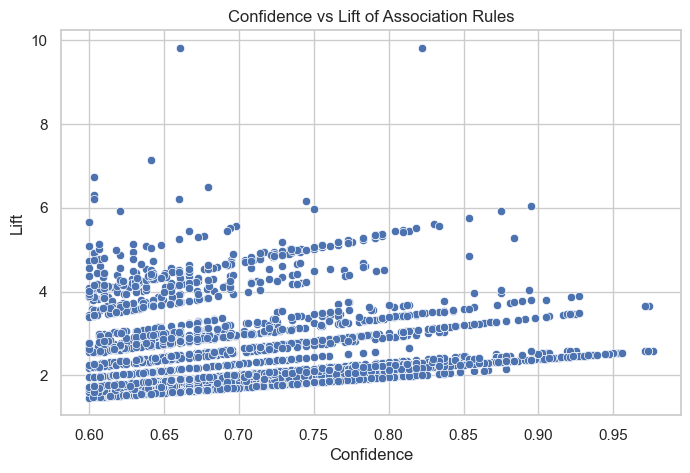

In [103]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='confidence',
    y='lift',
    data=rules
)
plt.title("Confidence vs Lift of Association Rules")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()


Rules with high lift and confidence indicate strong and meaningful movie associations.

In [109]:
single_movie_rules = rules[
    rules['antecedents'].apply(lambda x: len(x) == 1) &
    rules['consequents'].apply(lambda x: len(x) == 1)
]

readable_single = readable_rules(single_movie_rules, top_n=10)

readable_single[['rule', 'confidence', 'lift']]


,rule,confidence,lift
58,People who like High Noon also like Terminator...,0.902439,2.395761
120,People who like Point Break also like Terminat...,0.858491,2.279088
173,People who like The Talented Mr. Ripley also l...,0.850000,2.256548
101,People who like Waiter also like Muxmäuschenstill,0.822222,9.822619
172,People who like The Science of Sleep also like...,0.821429,2.180697
185,People who like The Science of Sleep also like...,0.821429,2.005605
130,People who like Rocky IV also like The 39 Steps,0.818182,2.359326
50,People who like Dave Chappelle's Block Party a...,0.809524,3.659266
49,People who like Dancer in the Dark also like T...,0.803279,2.132514
27,People who like Beetlejuice also like License ...,0.800000,3.387342


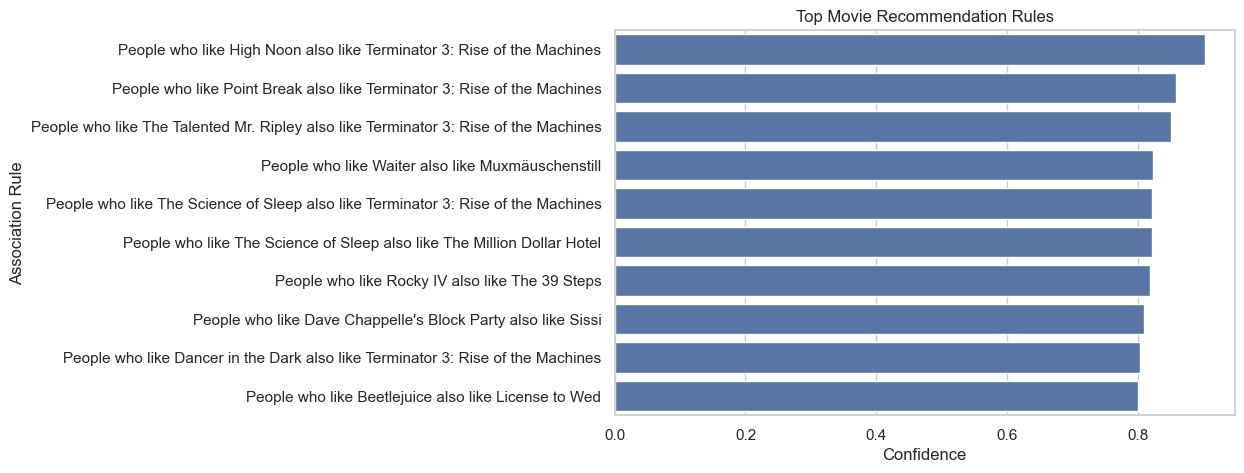

In [110]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='confidence',
    y='rule',
    data=readable_single
)
plt.title("Top Movie Recommendation Rules")
plt.xlabel("Confidence")
plt.ylabel("Association Rule")
plt.show()


### Conclusion

- High-confidence rules show strong likelihood relationships
- Lift > 1 indicates positive association between movies
- These rules can be used for recommendation systems

This project successfully applied association rule mining to movie ratings data.
By transforming user preferences into transaction data, meaningful movie relationships were discovered using the Apriori algorithm.